Opening raw data file /Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif...
    Range : 24000 ... 164499 =     96.000 ...   657.996 secs
Ready.
Reading 0 ... 140499  =      0.000 ...   561.996 secs...
<Info | 11 non-empty values
 bads: []
 ch_names: parcel_0, parcel_1, parcel_2, parcel_3, parcel_4, parcel_5, ...
 chs: 52 misc, 17 Stimulus
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition OSL ...
 dig: 0 items
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 1915-01-05 18:10:33 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: []
 sfreq: 250.0 Hz
>
Using matplotlib as 2D backend.


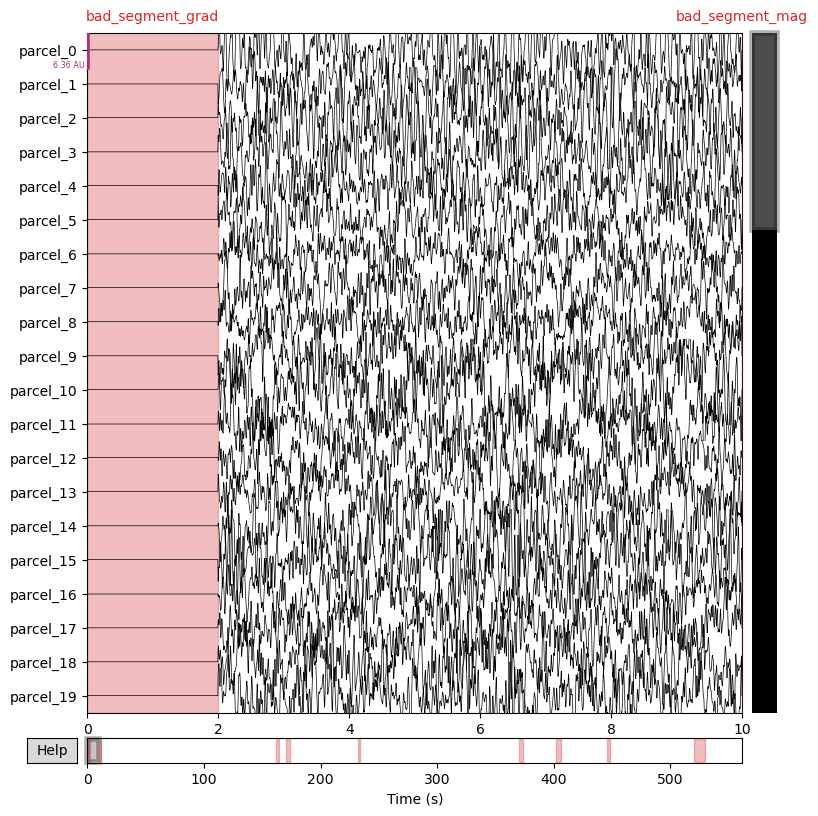

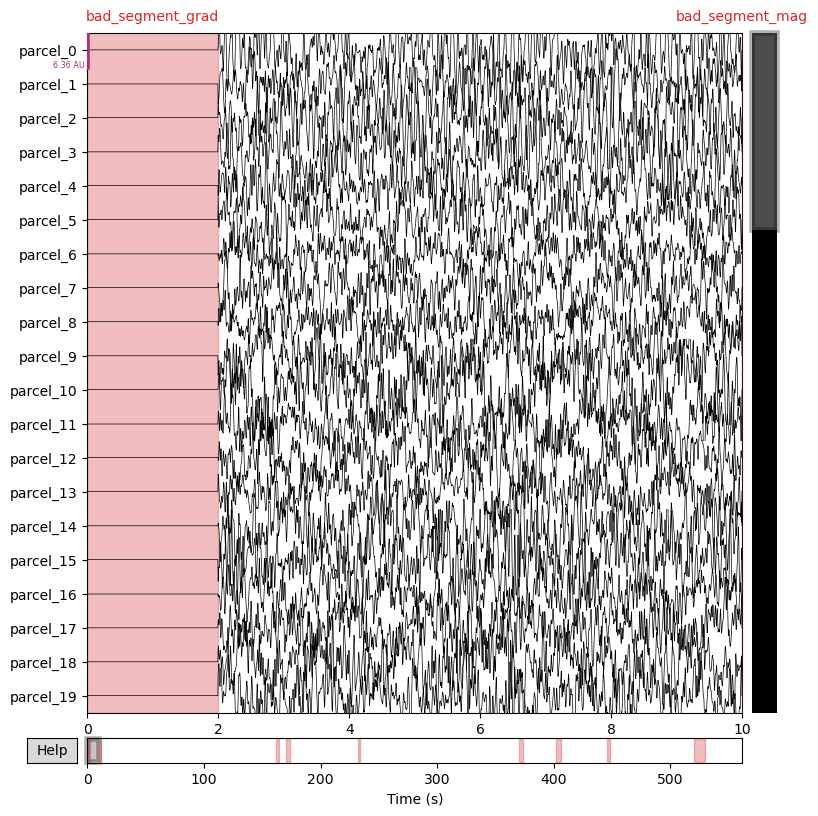

In [2]:
import mne

# Path to EEG data file
eeg_file = '/Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif'

# Reading EEG data
raw = mne.io.read_raw_fif(eeg_file, preload=True)
# Print information about the data
print(raw.info)

# Plot the data
raw.plot()

In [4]:
import pandas as pd
import mne

# Path to EEG data file
eeg_file = '/Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif'

# Reading EEG data
raw = mne.io.read_raw_fif(eeg_file, preload=True)
raw_df = raw.to_data_frame()
raw_df.to_csv('hmmm1.csv', index = False)

Opening raw data file /Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif...
    Range : 24000 ... 164499 =     96.000 ...   657.996 secs
Ready.
Reading 0 ... 140499  =      0.000 ...   561.996 secs...


In [6]:
import pandas as pd
import mne

# Path to EEG data file
eeg_file = '/Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif'

# Reading EEG data
raw = mne.io.read_raw_fif(eeg_file, preload=True)

# Extracting data and channel names
data, times = raw[:]
channel_names = raw.info['ch_names']

# Filter channels starting with "parcel_"
parcel_channels = [name for name in channel_names if name.startswith("parcel_")]
parcel_indices = [channel_names.index(name) for name in parcel_channels]

# Subset the data for "parcel_" channels
parcel_data = data[parcel_indices, :]

# Creating a DataFrame for parcel data
df = pd.DataFrame(parcel_data.T, columns=parcel_channels)
df['Time (s)'] = times

# Compute statistics
df['Mean'] = float(df[parcel_channels].mean(axis=1))
df['Median'] = float(df[parcel_channels].median(axis=1))
df['Std'] = float(df[parcel_channels].std(axis=1))
df['Variance'] = float(df[parcel_channels].var(axis=1))

# Remove old parcel_ channel data
df = df[['Time (s)', 'Mean', 'Median', 'Std', 'Variance']]

# Print the updated DataFrame
print(df.head())

# Save to a CSV file if needed
df.to_csv('parcel_eeg_statistics.csv', index=False)


Opening raw data file /Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif...
    Range : 24000 ... 164499 =     96.000 ...   657.996 secs
Ready.
Reading 0 ... 140499  =      0.000 ...   561.996 secs...
   Time (s)  Mean  Median  Std  Variance
0     0.000   0.0     0.0  0.0       0.0
1     0.004   0.0     0.0  0.0       0.0
2     0.008   0.0     0.0  0.0       0.0
3     0.012   0.0     0.0  0.0       0.0
4     0.016   0.0     0.0  0.0       0.0


In [12]:
import pandas as pd
import mne

# Path to EEG data file
eeg_file = '/Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif'

# Reading EEG data
raw = mne.io.read_raw_fif(eeg_file, preload=True)

# Extracting data and channel names
data, times = raw[:]
channel_names = raw.info['ch_names']

# Creating a DataFrame
df = pd.DataFrame(data.T, columns=channel_names)

# Compute statistics across rows (per column)
mean_row = df.mean(axis=0)
std_row = df.std(axis=0)
var_row = df.var(axis=0)
median_row = df.median(axis=0)

# Create a new DataFrame with only the computed statistics
stats_df = pd.DataFrame({
    'Channel': channel_names,
    'Mean': mean_row.values,
    'Std': std_row.values,
    'Variance': var_row.values,
    'Median': median_row.values,
})

# Set Channel as the index for better readability
stats_df.set_index('Channel', inplace=True)

# Print the updated DataFrame
print(stats_df)

# Save the DataFrame to a CSV file if needed
stats_df.to_csv('eeg_statistics_only.csv', index=True)


Opening raw data file /Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif...
    Range : 24000 ... 164499 =     96.000 ...   657.996 secs
Ready.
Reading 0 ... 140499  =      0.000 ...   561.996 secs...
                  Mean          Std      Variance       Median
Channel                                                       
parcel_0  1.598513e-10     3.096222  9.586589e+00    -0.000000
parcel_1  1.242686e-10     2.256076  5.089880e+00     0.000000
parcel_2 -1.463251e-10     3.333789  1.111415e+01     0.000000
parcel_3 -2.882641e-10     3.141706  9.870315e+00     0.000000
parcel_4  1.580120e-10     2.483545  6.167998e+00    -0.000000
...                ...          ...           ...          ...
STI013    0.000000e+00     0.000000  0.000000e+00     0.000000
STI014    0.000000e+00     0.000000  0.000000e+00     0.000000
STI101    0.000000e+00     0.000000  0.000000e+00     0.000000
STI201    7.633858e+03  1518.644688  2.306282e+06  7936.000000
STI301   -1.696073e-05     5.7

In [13]:
import pandas as pd
import mne
import os  # Thư viện để thao tác với tên file

# Path to EEG data file
eeg_file = '/Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif'

# Lấy tên file từ đường dẫn và cắt tại dấu gạch dưới đầu tiên
file_name = os.path.basename(eeg_file).split('_')[0]

# Reading EEG data
raw = mne.io.read_raw_fif(eeg_file, preload=True)

# Extracting data and channel names
data, times = raw[:]
channel_names = raw.info['ch_names']

# Filter channels starting with "parcel_"
parcel_channels = [name for name in channel_names if name.startswith("parcel_")]
parcel_indices = [channel_names.index(name) for name in parcel_channels]

# Subset the data for "parcel_" channels
parcel_data = data[parcel_indices, :]

# Creating a DataFrame for parcel data
df = pd.DataFrame(parcel_data.T, columns=parcel_channels)

# Compute statistics for each parcel channel
mean_values = df.mean(axis=0).values
std_values = df.std(axis=0).values
var_values = df.var(axis=0).values
median_values = df.median(axis=0).values

# Create a single-row DataFrame
result_row = {
    'File': file_name,  # Sử dụng tên file đã rút gọn
}

# Add statistics with unique column names
for i, channel in enumerate(parcel_channels):
    result_row[f"{channel}_mean"] = mean_values[i]
    result_row[f"{channel}_std"] = std_values[i]
    result_row[f"{channel}_variance"] = var_values[i]
    result_row[f"{channel}_median"] = median_values[i]

# Convert the dictionary to a DataFrame
result_df = pd.DataFrame([result_row])

# Print the resulting DataFrame
print(result_df)

# Save the DataFrame to a CSV file if needed
result_df.to_csv('eeg_statistics_single_row.csv', index=False)


Opening raw data file /Users/kaiser/Downloads/group_1/sub-CC110045_sflip_parc-raw.fif...
    Range : 24000 ... 164499 =     96.000 ...   657.996 secs
Ready.
Reading 0 ... 140499  =      0.000 ...   561.996 secs...
           File  parcel_0_mean  parcel_0_std  parcel_0_variance  \
0  sub-CC110045   1.598513e-10      3.096222           9.586589   

   parcel_0_median  parcel_1_mean  parcel_1_std  parcel_1_variance  \
0             -0.0   1.242686e-10      2.256076            5.08988   

   parcel_1_median  parcel_2_mean  ...  parcel_49_variance  parcel_49_median  \
0              0.0  -1.463251e-10  ...             3.55171              -0.0   

   parcel_50_mean  parcel_50_std  parcel_50_variance  parcel_50_median  \
0   -3.788248e-11       2.011531            4.046256              -0.0   

   parcel_51_mean  parcel_51_std  parcel_51_variance  parcel_51_median  
0    9.730930e-11       2.091758             4.37545              -0.0  

[1 rows x 209 columns]


In [19]:
import pandas as pd
import mne
import os

# Đường dẫn đến thư mục chứa các tệp .fif
folder_path = '/Users/kaiser/Downloads/group_3'

# Lấy danh sách tất cả các tệp .fif trong thư mục
eeg_files = [f for f in os.listdir(folder_path) if f.endswith('.fif')]

# Khởi tạo một DataFrame để lưu tất cả kết quả
all_results = []

# Lặp qua tất cả các tệp .fif
for eeg_file in eeg_files:
    file_path = os.path.join(folder_path, eeg_file)
    
    # Lấy tên file từ đường dẫn và cắt tại dấu gạch dưới đầu tiên
    file_name = os.path.basename(file_path).split('_')[0]

    # Đọc dữ liệu EEG
    raw = mne.io.read_raw_fif(file_path, preload=True)

    # Extracting data and channel names
    data, times = raw[:]
    channel_names = raw.info['ch_names']

    # Filter channels starting with "parcel_"
    parcel_channels = [name for name in channel_names if name.startswith("parcel_")]
    parcel_indices = [channel_names.index(name) for name in parcel_channels]

    # Subset the data for "parcel_" channels
    parcel_data = data[parcel_indices, :]

    # Creating a DataFrame for parcel data
    df = pd.DataFrame(parcel_data.T, columns=parcel_channels)

    # Compute statistics for each parcel channel
    mean_values = df.mean(axis=0).values
    std_values = df.std(axis=0).values
    var_values = df.var(axis=0).values
    median_values = df.median(axis=0).values

    # Create a single-row dictionary for this file
    result_row = {
        'File': file_name,  # Sử dụng tên file đã rút gọn
    }

    # Add statistics with unique column names
    for i, channel in enumerate(parcel_channels):
        result_row[f"{channel}_mean"] = mean_values[i]
        result_row[f"{channel}_std"] = std_values[i]
        result_row[f"{channel}_variance"] = var_values[i]
        result_row[f"{channel}_median"] = median_values[i]

    # Append result row to all_results
    all_results.append(result_row)

# Convert the list of results to a DataFrame
final_df = pd.DataFrame(all_results)

# Print the resulting DataFrame
print(final_df)

# Save the DataFrame to a CSV file if needed
final_df.to_csv('eeg_statistics_multiple_files.csv', index=False)


Opening raw data file /Users/kaiser/Downloads/group_3/sub-CC510256_sflip_parc-raw.fif...
    Range : 44000 ... 185999 =    176.000 ...   743.996 secs
Ready.
Reading 0 ... 141999  =      0.000 ...   567.996 secs...
Opening raw data file /Users/kaiser/Downloads/group_3/sub-CC620785_sflip_parc-raw.fif...
    Range : 17250 ... 157999 =     69.000 ...   631.996 secs
Ready.
Reading 0 ... 140749  =      0.000 ...   562.996 secs...
Opening raw data file /Users/kaiser/Downloads/group_3/sub-CC620499_sflip_parc-raw.fif...
    Range : 13750 ... 154249 =     55.000 ...   616.996 secs
Ready.
Reading 0 ... 140499  =      0.000 ...   561.996 secs...
Opening raw data file /Users/kaiser/Downloads/group_3/sub-CC520002_sflip_parc-raw.fif...
    Range : 30000 ... 171249 =    120.000 ...   684.996 secs
Ready.
Reading 0 ... 141249  =      0.000 ...   564.996 secs...
Opening raw data file /Users/kaiser/Downloads/group_3/sub-CC710088_sflip_parc-raw.fif...
    Range : 31500 ... 171999 =    126.000 ...   687.996

In [21]:
import pandas as pd

# Đọc ba tệp CSV vào ba DataFrame riêng biệt
df1 = pd.read_csv('/Users/kaiser/Documents/GitHub/Computational-Neuroscience/competition/eeg_statistics_multiple_files1.csv')
df2 = pd.read_csv('/Users/kaiser/Documents/GitHub/Computational-Neuroscience/competition/eeg_statistics_multiple_files2.csv')
df3 = pd.read_csv('/Users/kaiser/Documents/GitHub/Computational-Neuroscience/competition/eeg_statistics_multiple_files3.csv')

# Nối ba DataFrame theo chiều ngang (theo cột)
result = pd.concat([df1, df2, df3], axis=0)

# In kết quả
print(result)

# Lưu kết quả vào một tệp CSV nếu cần
result.to_csv('merged_result.csv', index=False)


            File  parcel_0_mean  parcel_0_std  parcel_0_variance  \
0   sub-CC120208  -5.690540e-10      3.861376          14.910227   
1   sub-CC120218  -1.160340e-10      2.948676           8.694690   
2   sub-CC110182   2.755566e-10      3.315166          10.990324   
3   sub-CC220223  -2.269527e-10      3.027707           9.167010   
4   sub-CC110087  -8.670296e-11      3.599065          12.953266   
..           ...            ...           ...                ...   
50  sub-CC512003  -5.072538e-11      3.614983          13.068103   
51  sub-CC711035  -5.613301e-11      3.499235          12.244644   
52  sub-CC610392  -2.354940e-10      2.316284           5.365173   
53  sub-CC710313  -1.013836e-10      3.160342           9.987762   
54  sub-CC720119   7.819578e-11      2.714125           7.366474   

    parcel_0_median  parcel_1_mean  parcel_1_std  parcel_1_variance  \
0          0.000000  -1.686014e-10      2.308039           5.327044   
1         -0.000000  -1.043970e-10      1

In [24]:
import pandas as pd

# Đọc hai tệp CSV vào các DataFrame
df1 = pd.read_csv('/Users/kaiser/Downloads/merged_result.csv')
df2 = pd.read_csv('/Users/kaiser/Downloads/filtered_subjects_with_age.csv')

# Nối hai DataFrame dựa trên cột 'id'
result = pd.merge(df1, df2, on='id', how='inner')

# In kết quả
print(result)

# Lưu kết quả vào tệp CSV nếu cần
result.to_csv('merged_result.csv', index=False)


KeyError: 'id'

In [26]:
import pandas as pd

# Đọc hai tệp CSV vào các DataFrame
df1 = pd.read_csv('/Users/kaiser/Downloads/merged_result.csv')
df2 = pd.read_csv('/Users/kaiser/Downloads/filtered_subjects_with_age.csv')

# In tên các cột để kiểm tra
print("Cột của df1:", df1.columns)
print("Cột của df2:", df2.columns)

# Nối hai DataFrame dựa trên cột 'id'
result = pd.merge(df1, df2, on='id', how='inner')

# In kết quả
print(result)


Cột của df1: Index(['id;parcel_0_mean;parcel_0_std;parcel_0_variance;parcel_0_median;parcel_1_mean;parcel_1_std;parcel_1_variance;parcel_1_median;parcel_2_mean;parcel_2_std;parcel_2_variance;parcel_2_median;parcel_3_mean;parcel_3_std;parcel_3_variance;parcel_3_median;parcel_4_mean;parcel_4_std;parcel_4_variance;parcel_4_median;parcel_5_mean;parcel_5_std;parcel_5_variance;parcel_5_median;parcel_6_mean;parcel_6_std;parcel_6_variance;parcel_6_median;parcel_7_mean;parcel_7_std;parcel_7_variance;parcel_7_median;parcel_8_mean;parcel_8_std;parcel_8_variance;parcel_8_median;parcel_9_mean;parcel_9_std;parcel_9_variance;parcel_9_median;parcel_10_mean;parcel_10_std;parcel_10_variance;parcel_10_median;parcel_11_mean;parcel_11_std;parcel_11_variance;parcel_11_median;parcel_12_mean;parcel_12_std;parcel_12_variance;parcel_12_median;parcel_13_mean;parcel_13_std;parcel_13_variance;parcel_13_median;parcel_14_mean;parcel_14_std;parcel_14_variance;parcel_14_median;parcel_15_mean;parcel_15_std;parcel_15_va

KeyError: 'id'

In [28]:
import pandas as pd

# Đọc lại hai tệp CSV và chỉ định dấu phân cách là ";"
df1 = pd.read_csv('/Users/kaiser/Downloads/merged_result.csv', sep=';')
df2 = pd.read_csv('/Users/kaiser/Downloads/filtered_subjects_with_age.csv', sep=';')

# In tên các cột để kiểm tra lại
print("Cột của df1:", df1.columns)
print("Cột của df2:", df2.columns)

# Nối hai DataFrame dựa trên cột 'id'
result = pd.merge(df1, df2, on='id', how='inner')

# In kết quả
print(result)

# Lưu kết quả vào tệp CSV nếu cần
result.to_csv('merged_result.csv', index=False)


Cột của df1: Index(['id', 'parcel_0_mean', 'parcel_0_std', 'parcel_0_variance',
       'parcel_0_median', 'parcel_1_mean', 'parcel_1_std', 'parcel_1_variance',
       'parcel_1_median', 'parcel_2_mean',
       ...
       'parcel_49_variance', 'parcel_49_median', 'parcel_50_mean',
       'parcel_50_std', 'parcel_50_variance', 'parcel_50_median',
       'parcel_51_mean', 'parcel_51_std', 'parcel_51_variance',
       'parcel_51_median'],
      dtype='object', length=209)
Cột của df2: Index(['id', 'age'], dtype='object')
               id  parcel_0_mean  parcel_0_std  parcel_0_variance  \
0    sub-CC120208  -5.690540e-10      3.861376          14.910227   
1    sub-CC120218  -1.160340e-10      2.948676           8.694690   
2    sub-CC110182   2.755566e-10      3.315166          10.990324   
3    sub-CC220223  -2.269527e-10      3.027707           9.167010   
4    sub-CC110087  -8.670296e-11      3.599065          12.953266   
..            ...            ...           ...                .